<a href="https://colab.research.google.com/github/filipefelisardo/Clepsydra/blob/main/precipitacoes_1989.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

               DATA  ALCOENTRE (18D/03C)  BARRAGEM DE MONTARGIL (19H/02C)  \
0  01/01/1989 09:00                 69.5                             35.0   
1  01/02/1989 09:00                 82.8                             54.4   
2  01/03/1989 09:00                 69.8                             26.0   
3  01/04/1989 09:00                 86.6                             80.0   
4  01/05/1989 09:00                 93.6                             56.9   

   LARANJAL (PONTE SÔR) (18I/01C)  MECA (19C/08C)  MOINHOLA (22F/03C)  \
0                            49.2            59.3                41.9   
1                            67.4            62.6                54.2   
2                            36.1            47.1                27.5   
3                            56.6           102.6                82.1   
4                           117.7           120.4               157.4   

   MONTE DA CAPARICA (22B/01C)  PEDROGÃO (16F/04C)  SANTARÉM (ESA) (18E/01C)  \
0                 

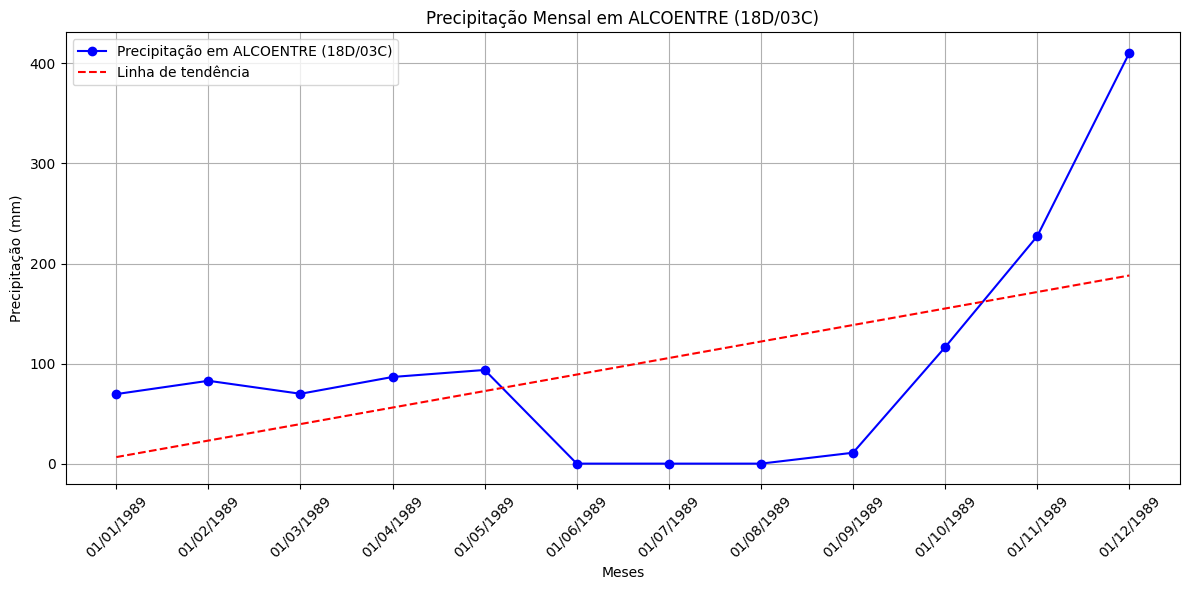

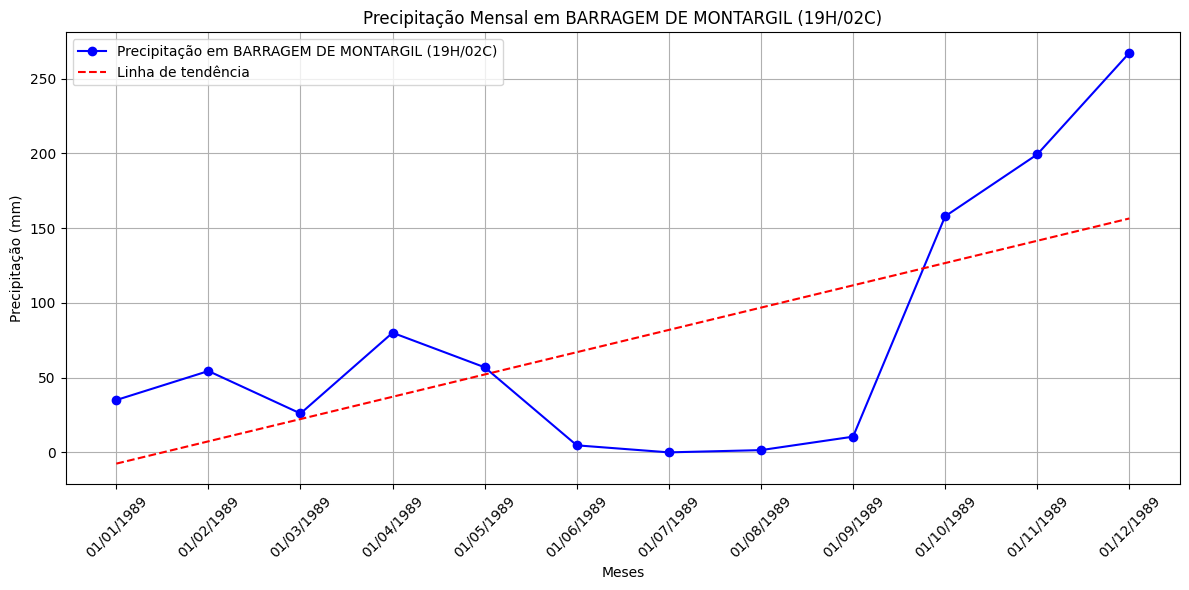

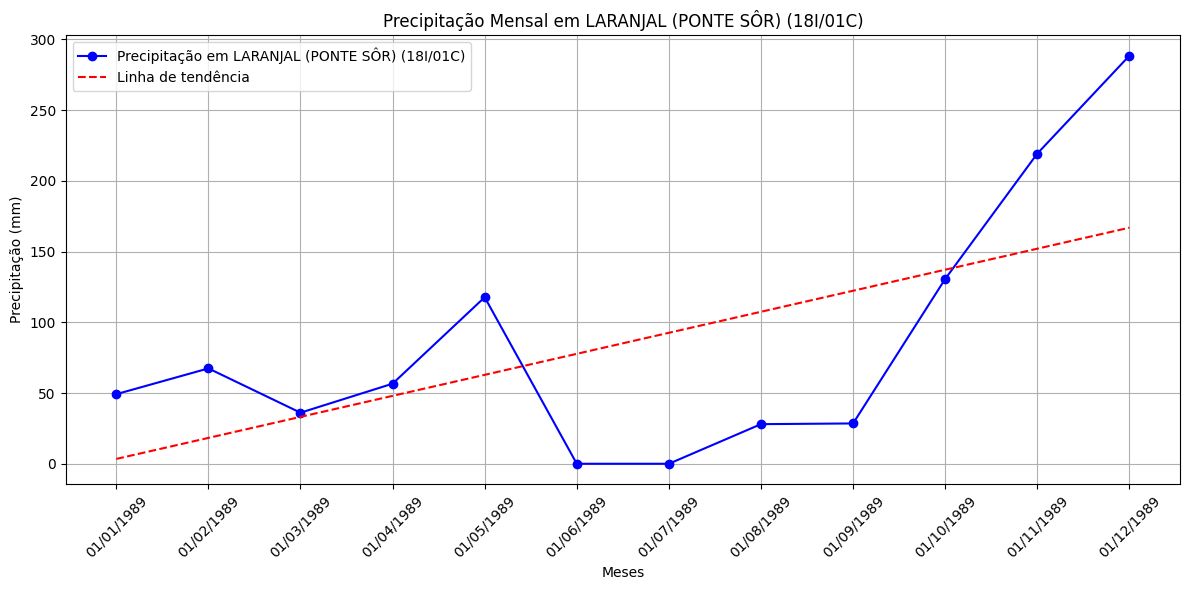

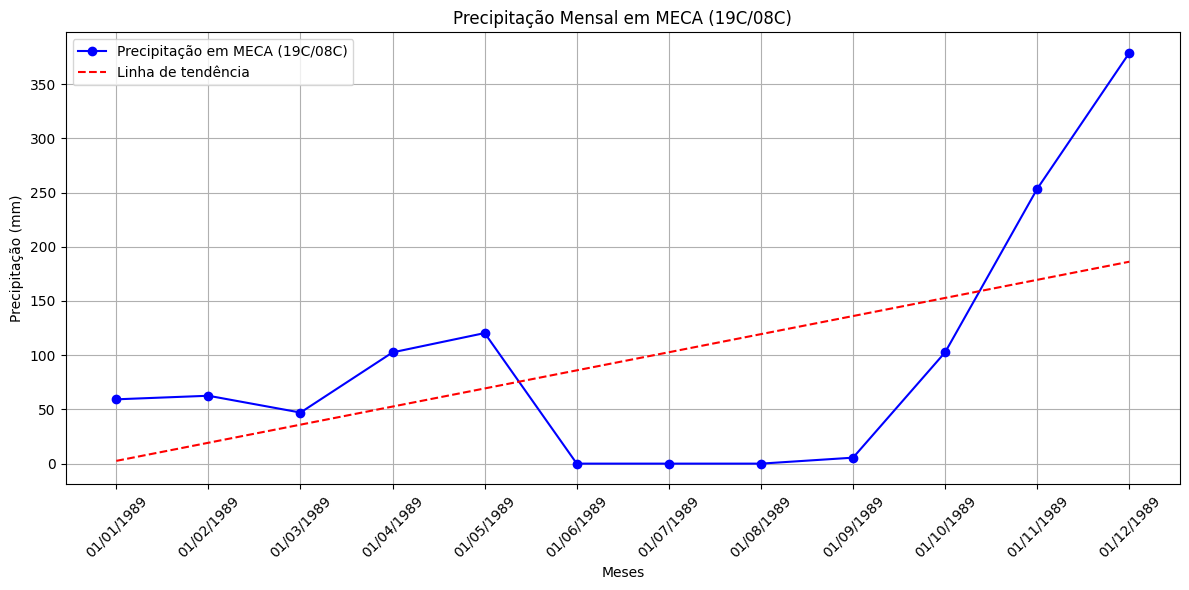

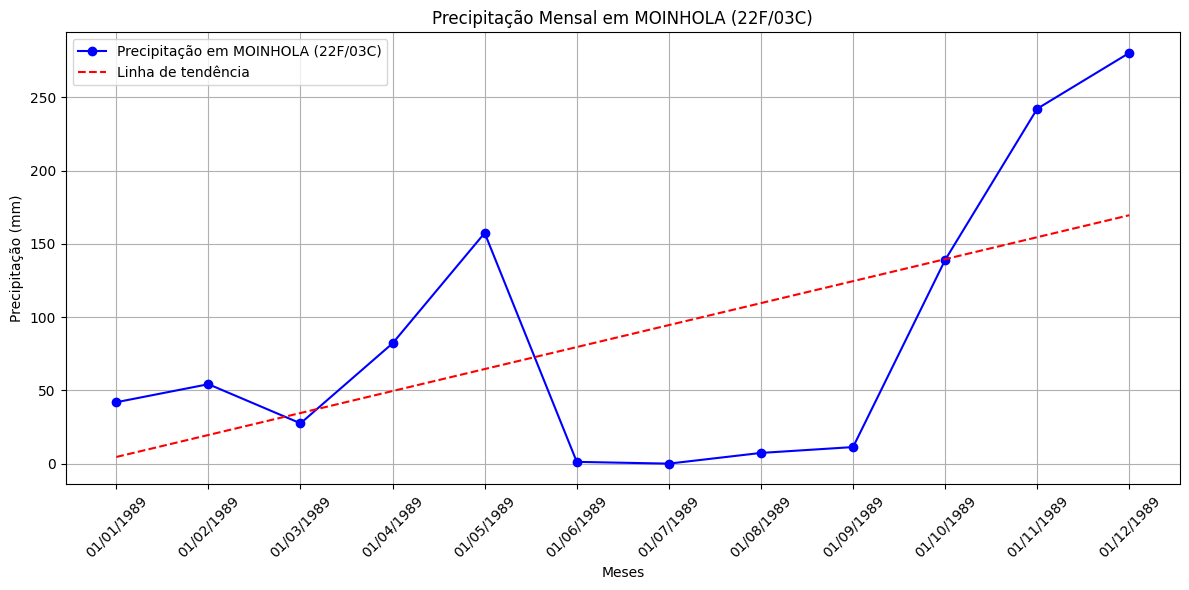

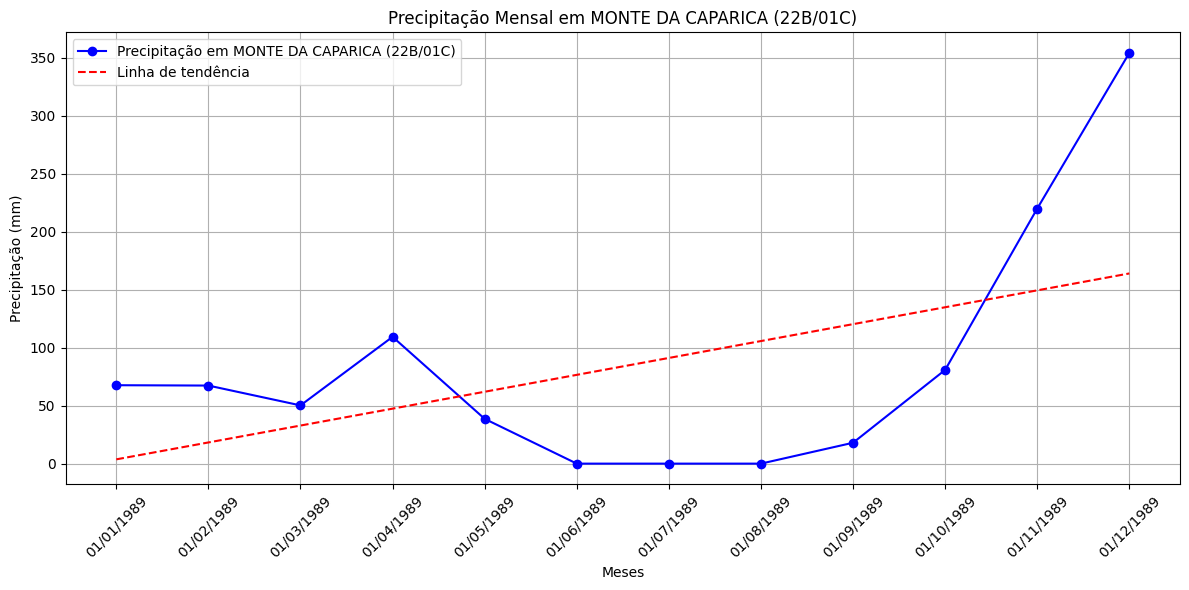

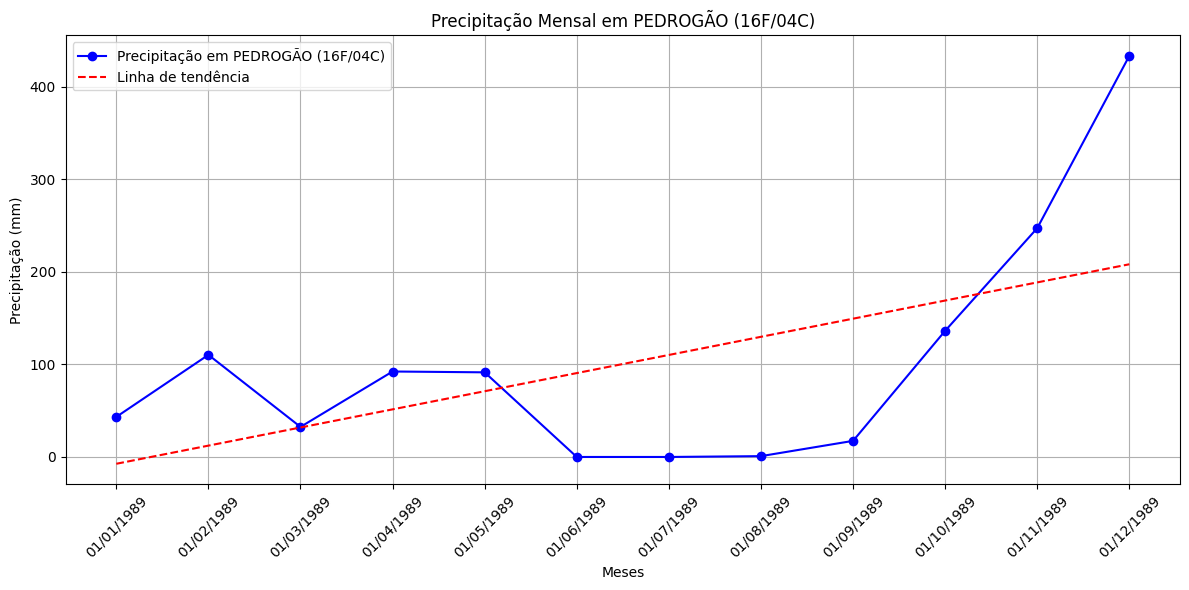

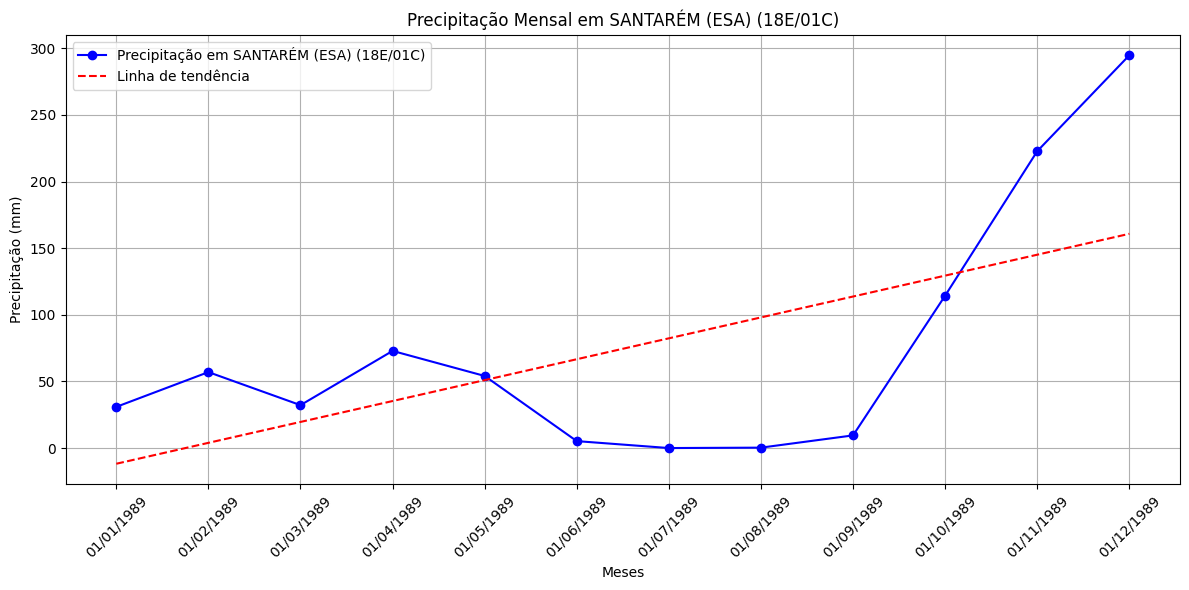

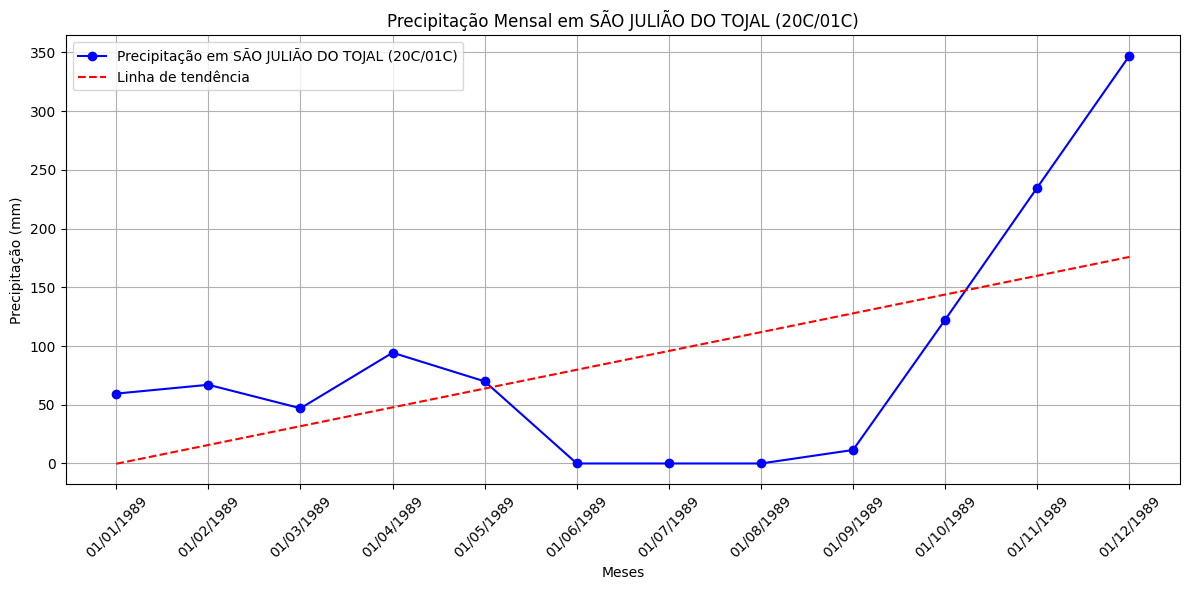

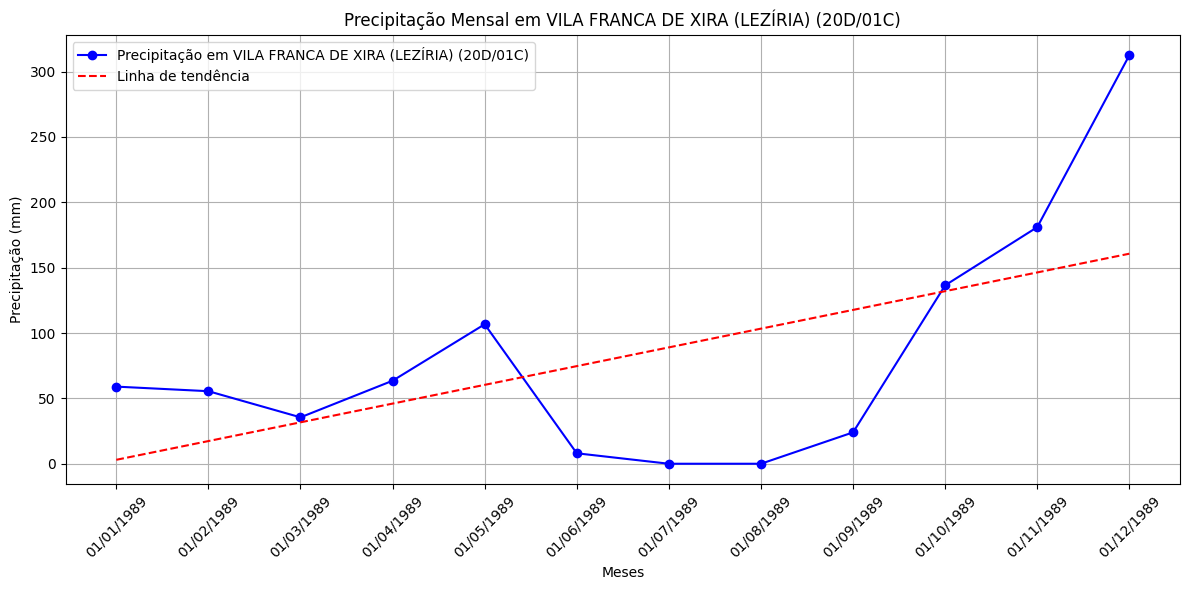

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados do arquivo CSV
file_path = 'precipitacoes_mensais_1989.csv'  # Atualize para o caminho correto do seu arquivo
df = pd.read_csv(file_path, sep=';', header=0, skiprows=1)

# Verificar as primeiras linhas do dataframe para entender a estrutura dos dados
print(df.head())

# Assumindo que a primeira coluna contém os meses e as outras colunas são estações
df['DATA'] = df['DATA'].str[:10]  # Extraindo apenas a data
df.set_index('DATA', inplace=True)

# Verificar o índice e colunas do dataframe
print(df.index)
print(df.columns)

# Função para adicionar linha de tendência
def add_trendline(ax, x, y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), linestyle='--', color='r', label='Linha de tendência')

# Plotar gráficos de precipitação para cada estação
for column in df.columns:
    plt.figure(figsize=(12, 6))
    x = np.arange(len(df.index))
    y = df[column].astype(float).values
    plt.plot(df.index, y, label=f'Precipitação em {column}', color='b', linestyle='-', marker='o')

    # Adicionar linha de tendência
    ax = plt.gca()
    add_trendline(ax, x, y)

    plt.title(f'Precipitação Mensal em {column}')
    plt.xlabel('Meses')
    plt.ylabel('Precipitação (mm)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
